In [1]:
import json
import pandas as pd
from statistics import mean  
import seaborn as sns 
import matplotlib.pyplot as plt 
import collections

In [2]:
with open('anonymized_project.json') as f:
    data_responses = json.load(f) 

with open('references.json') as f:
    data_ref = json.load(f)

In [ ]:
# The dataset consists of images taken from an automotive dataset and the annotators are presented with each image and 
# asked the question "Do you see a bicycle?" They are then able to respond with "yes" if they see a bicycle, 
# "no" if they do not see a bicycle, "can't solve" if they are unable to decide, or "corrupt data" if they believe 
# there is an issue with the data. 
# The purpose of the dataset is to evaluate the quality and performance of a new crowd of annotators.

In [3]:
# We can transform the dictionary into a dataframe by following these steps:

# - Import the pandas library.
# - Extract the nested dictionaries from the original dictionary and convert them to a list of dictionaries.
# - Create a pandas DataFrame from the list of dictionaries. 


# Extract nested dictionaries and convert to list of dictionaries
results_list = []
for node_id, node_data in data_responses["results"]["root_node"]["results"].items():
    for result in node_data["results"]:
        result_dict = result.copy()
        result_dict.update({"image_id": result['task_input']['image_url'][-12:-4], "annotator_id": result["user"]["id"]}) 
        results_list.append(result_dict)

# Create pandas DataFrame
df_annotators = pd.DataFrame(results_list) 

# This code will create a pandas DataFrame with columns for all the keys in the dictionaries in the original dictionary, 
# plus additional column for "image_id" value and "annotator_id", since we need them for the questions.

In [4]:
df_annotators.head()

,task_input,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,task_output,user,root_input,project_root_node_input_id,image_id,annotator_id
0,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T14:08:11.319438+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0000439a-96ac-4bd4-8753-a4baa229ecf2,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '08af8775-a72...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,08af8775-a72c-4c59-b60f-9ce7df04fa92
1,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T13:14:39.411149+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0488b469-7c5f-459a-bfcb-ed94957c09c2,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '62f1cf90-71c...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d
2,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T15:19:57.889434+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,323902a9-3b41-4885-8796-4e393aa2e0a0,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '780c974e-6ce...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,780c974e-6ce7-4f1d-9afe-56bf96753fca
3,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-26T03:56:18.770331+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,4222ac20-7aaa-4b07-bb2b-4423bf41eefe,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '94afdf79-917...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,94afdf79-917c-4904-bdaa-7a121f33b0ff
4,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T15:39:06.644705+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,42ba767f-5bd1-4e62-aff1-4e716fd23623,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '37a6036c-a9e...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,37a6036c-a9ef-4fcb-b554-7058f00415db


In [5]:
#Concerting the references dictionary to a dataframe 

df_bicycle = pd.DataFrame(data_ref).T.reset_index()
df_bicycle.columns = ['image_id', 'Answer'] 


In [6]:
df_bicycle.head()

,image_id,Answer
0,img_4686,False
1,img_8607,True
2,img_5541,False
3,img_3218,False
4,img_3247,True


In [7]:
df = pd.merge(df_annotators, df_bicycle, on="image_id", how="left")

In [8]:
df.head()

,task_input,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,task_output,user,root_input,project_root_node_input_id,image_id,annotator_id,Answer
0,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T14:08:11.319438+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0000439a-96ac-4bd4-8753-a4baa229ecf2,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '08af8775-a72...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,08af8775-a72c-4c59-b60f-9ce7df04fa92,False
1,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T13:14:39.411149+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0488b469-7c5f-459a-bfcb-ed94957c09c2,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '62f1cf90-71c...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,False
2,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T15:19:57.889434+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,323902a9-3b41-4885-8796-4e393aa2e0a0,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '780c974e-6ce...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,780c974e-6ce7-4f1d-9afe-56bf96753fca,False
3,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-26T03:56:18.770331+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,4222ac20-7aaa-4b07-bb2b-4423bf41eefe,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '94afdf79-917...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,94afdf79-917c-4904-bdaa-7a121f33b0ff,False
4,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T15:39:06.644705+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,42ba767f-5bd1-4e62-aff1-4e716fd23623,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '37a6036c-a9e...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,37a6036c-a9ef-4fcb-b554-7058f00415db,False


In [9]:
#1 - a) 
#To find the  number of annotators who contributed to the dataset, 
#we can count the unique annotator IDs in the annotator responses file. 

annotators = df['annotator_id'].unique()

print("The number of annotators that did contribute to the dataset is equal to", len(annotators))

The number of annotators that did contribute to the dataset is equal to 22


Minimum duration 10 ms
Maximum duration 42398 ms
Average duration 1289.921354992076 ms


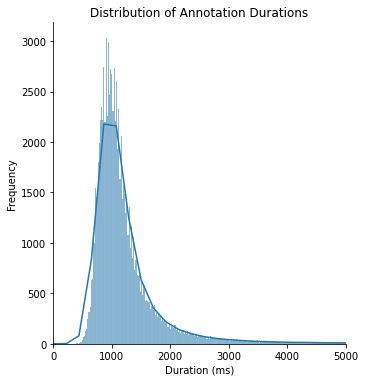

In [10]:
#1 - b)  

dur = [] 

for i in range(len(df.task_output)) :  
    if (df.task_output[i]['duration_ms'] > 0) : 
        dur.append(df.task_output[i]['duration_ms'])

print("Minimum duration", min(dur), 'ms') 
print("Maximum duration", max(dur), 'ms') 
print("Average duration", mean(dur), 'ms')

'''' 
You are iterating through each row of the task_output column and appending the duration to a list dur if it is 
greater than zero. Then you are using the min, max, and mean functions from the statistics module to calculate the 
minimum, maximum, and average durations, respectively.
''' 


sns.displot(dur, kde=True)
plt.title('Distribution of Annotation Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency') 
plt.xlim(0,5000)
plt.show()


In [11]:
#1 - c)  

#count the number of non-missing values in the task_output column for each annotator, 
#which corresponds to the number of results they produced.
counts = df.groupby('annotator_id')['task_output'].count()
print(counts) 


#This simply groups the data by annotator_id and counts the number of task_output entries for each annotator, 
#which gives an idea of how many tasks each annotator completed. 


annotator_id
08af8775-a72c-4c59-b60f-9ce7df04fa92    6210
0e606b41-ebe4-4d7d-996c-db910c84971a    6126
2d521e66-c47c-4033-ba9e-95dcab974ae5     630
32971d11-e972-4d73-99a6-0847e1261995    5170
37a6036c-a9ef-4fcb-b554-7058f00415db    7596
44629999-ab8a-4871-b4d3-4f92c3058161    1280
4ceeee9d-1588-4b31-82c6-6744d3d00bab     315
5765cc32-9e32-43e1-bd78-384cfd52d55a    5337
62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d    6436
66d63556-1235-4a5e-accc-651cb2993db4    5061
6d8be901-c6a6-43f8-a5ac-8e44b924bd84    4860
70b9b917-b4f2-4ed1-b8f9-f3492f980103    2950
75f1e1c8-d127-430f-a885-c2d126364198    6088
780c974e-6ce7-4f1d-9afe-56bf96753fca    1745
94afdf79-917c-4904-bdaa-7a121f33b0ff    3485
9fddf227-6680-42f5-aca5-533fc439c193    6421
b04e6596-24c3-4e0b-b96a-4a6d78c04b40    1725
b44e310d-7985-41a0-b764-034b711c75ca     170
d40ae601-32bf-4b0c-b92c-5bd474e40c18    2175
da2b934c-6384-44ea-adcd-3de648bfae89    6537
e336139c-5228-42cd-b501-81855532dfa6    3475
fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54    70

In [12]:
#1 - d 

# Create a new dataframe with image_id and annotator_id columns
df_annot = df[['image_id', 'annotator_id']].copy()

# Create dummy variables for each annotator_id
dummies = pd.get_dummies(df_annot['annotator_id'])

# Concatenate the original dataframe with the dummy variables
matrix = pd.concat([df_annot, dummies], axis=1)


# Get true answers
answers = df[['image_id', 'Answer']].drop_duplicates('image_id')

# Merge with matrix to get answers from annotators
merged = pd.merge(matrix, answers, on='image_id')

# Count number of matches with true answer
merged['matches'] = merged.apply(lambda row: (row.drop('image_id') == row['Answer']).sum(), axis=1)

# Calculate agreement rate
agreement_rate = merged['matches'].mean()

print(agreement_rate) 


''' 
We can compare the answers of the annotators with the true answers and count the number of matches. 

Here, we first extract the true answers from the original dataframe and store them in a separate dataframe called answers. 
We then merge matrix and answers on the image_id column to get the answers from the annotators for each image alongside 
the true answer. We then count the number of matches between the answers from the annotators and the true answer for each 
image and store the result in a new column called matches. Finally, we calculate the agreement rate by taking the mean of 
the matches column.

(row.drop('image_id') == row['Answer']): This compares all the columns in the row except for the image_id column to the 
Answer column, which contains the ground truth for the image.
'''


11.906459777704413


" \nWe can compare the answers of the annotators with the true answers and count the number of matches. \n\nHere, we first extract the true answers from the original dataframe and store them in a separate dataframe called answers. \nWe then merge matrix and answers on the image_id column to get the answers from the annotators for each image alongside \nthe true answer. We then count the number of matches between the answers from the annotators and the true answer for each \nimage and store the result in a new column called matches. Finally, we calculate the agreement rate by taking the mean of \nthe matches column.\n\n(row.drop('image_id') == row['Answer']): This compares all the columns in the row except for the image_id column to the \nAnswer column, which contains the ground truth for the image.\n"

In [13]:
''' 
The result 11.906459777704413 is the average number of disagreements between annotators across all questions 
in the dataset.
''' 

merged['matches'].describe()


count    90870.000000
mean        11.906460
std          9.999618
min          2.000000
25%          2.000000
50%          2.000000
75%         22.000000
max         22.000000
Name: matches, dtype: float64

In [ ]:
''' 
The information you obtained from merged['matches'].describe() gives us an idea about the distribution of the 
number of matches (i.e., the number of annotators who agreed on the answer) for the questions in your dataset. 
Specifically, it tells you that:

- There are 90,870 questions in your dataset.
- The average number of matches per question is 11.91, which means that, on average, there are about 12 annotators who 
agree on the answer.
- The standard deviation of the number of matches is 9.99, which means that the number of matches varies a lot across 
questions.
- The minimum number of matches is 2, which means that there are questions for which only 2 annotators agreed on the 
answer.
- The maximum number of matches is 22, which means that there are questions for which all 22 annotators agreed on the 
answer.
- The median and the 25th percentile of the number of matches are both 2, which means that about 50% of the questions 
have only 2 annotators who agree on the answer.
- The 75th percentile of the number of matches is 22, which means that about 25% of the questions have all 22 annotators 
who agree on the answer.
Based on this information, we can conclude that there are some questions for which annotators highly disagree (i.e., 
questions with a low number of matches).
'''

The response <cant_solve> occurs 17 times and the response <corrupt_data> occurs 4 times.


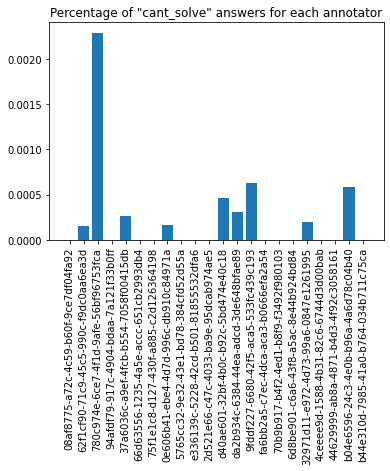

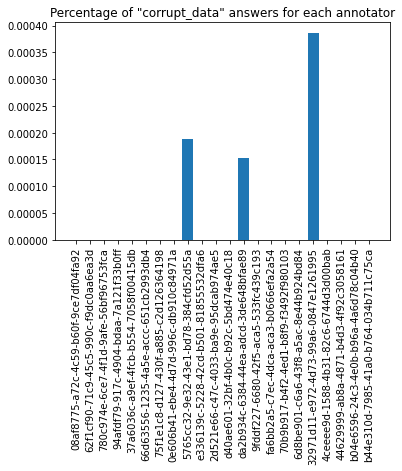

In [14]:
#2 


cant_solve_counts = collections.defaultdict(int)
corrupt_data_counts = collections.defaultdict(int) 
answers_counts = collections.defaultdict(int)

for _, row in df.iterrows():
    annotator_id = row['annotator_id']
    task_output = row['task_output']
    if (task_output['cant_solve']==True):
        cant_solve_counts[annotator_id] += 1
    if (task_output['corrupt_data']==True):
        corrupt_data_counts[annotator_id] += 1 
    if (task_output['answer'] != None):
        answers_counts[annotator_id] += 1 

''' 
This code will iterate over each row of the df dataframe, extract the annotator_id and task_output columns, 
and update the counts in the cant_solve_counts and corrupt_data_counts dictionaries if the corresponding option is 
present in the task_output. The collections.defaultdict(int) creates a dictionary where the default value for each key 
is 0, so we can increment the count for each annotator without having to check if the key exists in the dictionary or not.

To count the number of times each value appears in the dictionary, you can use the values() method to get a 
list of all the values and then use the sum() function to add them up. 
''' 

print("The response <cant_solve> occurs", sum(cant_solve_counts.values()), "times and the response <corrupt_data>"
      " occurs", sum(corrupt_data_counts.values()), "times.") 

# Calculate percentages of times "cant_solve" and "corrupt_data" were used for each annotator
cant_solve_percentages = {}
corrupt_data_percentages = {}
for annotator_id in annotators:
    total_answers = cant_solve_counts.get(annotator_id, 0) + corrupt_data_counts.get(annotator_id, 0) + answers_counts.get(annotator_id, 0)
    if total_answers > 0:
        cant_solve_percentages[annotator_id] = cant_solve_counts.get(annotator_id, 0) / total_answers
        corrupt_data_percentages[annotator_id] = corrupt_data_counts.get(annotator_id, 0) / total_answers


# Create bar chart of "cant_solve" percentages for each annotator
plt.bar(range(len(cant_solve_percentages)), list(cant_solve_percentages.values()), align='center')
plt.xticks(range(len(cant_solve_percentages)), list(cant_solve_percentages.keys()), rotation=90)
plt.title('Percentage of "cant_solve" answers for each annotator')
plt.show()

# Create bar chart of "corrupt_data" percentages for each annotator
plt.bar(range(len(corrupt_data_percentages)), list(corrupt_data_percentages.values()), align='center')
plt.xticks(range(len(corrupt_data_percentages)), list(corrupt_data_percentages.keys()), rotation=90)
plt.title('Percentage of "corrupt_data" answers for each annotator')
plt.show()



#The percentages in the plot represent the probability that a particular annotator used either the cant_solve or 
#corrupt_data options. 


In [15]:
df.Answer.value_counts()

True     45860
False    45010
Name: Answer, dtype: int64

In [ ]:
''' 
The reference set is slightly unbalanced as there are more examples with the answer "True" than with the answer "False". 
However, this is a relatively small difference, so the reference set can still be considered reasonably balanced.
'''

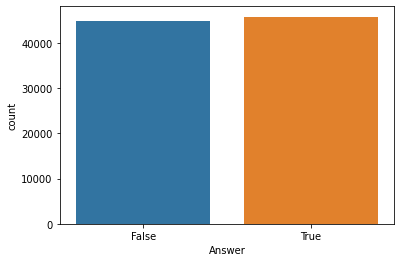

In [16]:

#We can use a countplot to visualize the distribution of answers. 
#A countplot is a type of bar plot that shows the count of observations in each categorical bin using bars.

sns.countplot(x='Answer', data=df)
plt.show() 


#This will create a countplot where the x-axis represents the answers and the y-axis represents the count of observations. 
#The plot will show two bars, one for "True" and one for "False", indicating the number of occurrences of each answer in 
#the dataset.


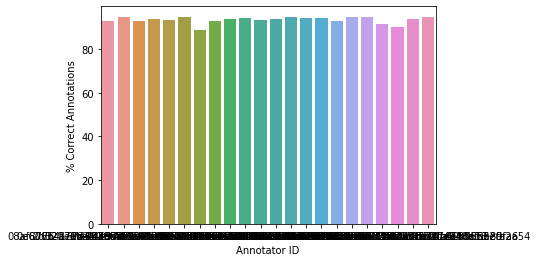

In [17]:
#4 

#You can replace True values in the Answer column with 'yes' and False values with 'no', so that you can compare 
#them with the answer field in the task_output column. 
df['Answer'] = df['Answer'].apply(lambda x: 'yes' if x else 'no') 

# create a new column. we compare the "answer" value in the "task_output" dictionary with the corresponding "Answer" value 
#for each row in the DataFrame, and set the "correct" value to True or False depending on whether they match or not.
df['correct'] = df.apply(lambda x: x['task_output']['answer'] == x['Answer'], axis=1)

# group the results by annotator_id and calculate the percentage of correct annotations
correct_pct = df.groupby('annotator_id')['correct'].mean() * 100

# plot the results
sns.barplot(x=correct_pct.index, y=correct_pct.values)
plt.xlabel('Annotator ID')
plt.ylabel('% Correct Annotations')
plt.show() 


#This will create a bar plot that shows the percentage of correct annotations for each annotator. 
#Annotators with a high percentage of correct annotations are likely to be good annotators, while annotators with a 
#low percentage of correct annotations are likely to be bad annotators.


In [18]:
df.head()

,task_input,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,task_output,user,root_input,project_root_node_input_id,image_id,annotator_id,Answer,correct
0,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T14:08:11.319438+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0000439a-96ac-4bd4-8753-a4baa229ecf2,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '08af8775-a72...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,08af8775-a72c-4c59-b60f-9ce7df04fa92,no,True
1,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T13:14:39.411149+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0488b469-7c5f-459a-bfcb-ed94957c09c2,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '62f1cf90-71c...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,no,True
2,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T15:19:57.889434+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,323902a9-3b41-4885-8796-4e393aa2e0a0,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '780c974e-6ce...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,780c974e-6ce7-4f1d-9afe-56bf96753fca,no,True
3,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-26T03:56:18.770331+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,4222ac20-7aaa-4b07-bb2b-4423bf41eefe,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '94afdf79-917...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,94afdf79-917c-4904-bdaa-7a121f33b0ff,no,True
4,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T15:39:06.644705+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,42ba767f-5bd1-4e62-aff1-4e716fd23623,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '37a6036c-a9e...",{'image_url': 'https://qm-auto-annotator.s3.eu...,7e8984b6-dff7-4015-865a-b721a2faf681,img_4686,37a6036c-a9ef-4fcb-b554-7058f00415db,no,True


In [19]:
correct_pct

annotator_id
08af8775-a72c-4c59-b60f-9ce7df04fa92    92.979066
0e606b41-ebe4-4d7d-996c-db910c84971a    94.825335
2d521e66-c47c-4033-ba9e-95dcab974ae5    92.857143
32971d11-e972-4d73-99a6-0847e1261995    93.636364
37a6036c-a9ef-4fcb-b554-7058f00415db    93.483412
44629999-ab8a-4871-b4d3-4f92c3058161    94.843750
4ceeee9d-1588-4b31-82c6-6744d3d00bab    88.888889
5765cc32-9e32-43e1-bd78-384cfd52d55a    92.655050
62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d    93.629584
66d63556-1235-4a5e-accc-651cb2993db4    94.230389
6d8be901-c6a6-43f8-a5ac-8e44b924bd84    93.333333
70b9b917-b4f2-4ed1-b8f9-f3492f980103    94.000000
75f1e1c8-d127-430f-a885-c2d126364198    94.842313
780c974e-6ce7-4f1d-9afe-56bf96753fca    94.212034
94afdf79-917c-4904-bdaa-7a121f33b0ff    94.203730
9fddf227-6680-42f5-aca5-533fc439c193    92.820433
b04e6596-24c3-4e0b-b96a-4a6d78c04b40    94.666667
b44e310d-7985-41a0-b764-034b711c75ca    94.705882
d40ae601-32bf-4b0c-b92c-5bd474e40c18    91.494253
da2b934c-6384-44ea-adcd-3de648bfae89 

In [20]:
from sklearn.metrics import cohen_kappa_score

for annotator_id in annotators : 
    # filter the DataFrame to only include the rows with this annotator's answers
    annotator_df = df[df['annotator_id'] == annotator_id]

    # extract the annotator's answers and the correct answers as lists
    annotator_answers = list(annotator_df['task_output'].apply(lambda x: x['answer'])) 
    correct_answers = list(annotator_df['Answer']) 

    # calculate the Cohen's kappa score
    kappa = cohen_kappa_score(correct_answers, annotator_answers)
    print(f"Cohen's kappa score for annotator {annotator_id}: {kappa}") 

Cohen's kappa score for annotator 08af8775-a72c-4c59-b60f-9ce7df04fa92: 0.8591838052950709
Cohen's kappa score for annotator 62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d: 0.8726244950554839
Cohen's kappa score for annotator 780c974e-6ce7-4f1d-9afe-56bf96753fca: 0.8845063777223684
Cohen's kappa score for annotator 94afdf79-917c-4904-bdaa-7a121f33b0ff: 0.8841310362649101
Cohen's kappa score for annotator 37a6036c-a9ef-4fcb-b554-7058f00415db: 0.8696987332912907
Cohen's kappa score for annotator 66d63556-1235-4a5e-accc-651cb2993db4: 0.8846380287985731
Cohen's kappa score for annotator 75f1e1c8-d127-430f-a885-c2d126364198: 0.8968389403060609
Cohen's kappa score for annotator 0e606b41-ebe4-4d7d-996c-db910c84971a: 0.8965200662483188
Cohen's kappa score for annotator 5765cc32-9e32-43e1-bd78-384cfd52d55a: 0.8528661818337308
Cohen's kappa score for annotator e336139c-5228-42cd-b501-81855532dfa6: 0.8739504567034042
Cohen's kappa score for annotator 2d521e66-c47c-4033-ba9e-95dcab974ae5: 0.8571140567511718

In [ ]:
''' 
While having the percentages of correct answers and Cohen's kappa score for each annotator is a good start, 
it might not be enough to make definitive judgments about the quality of the annotations. For example even if an 
annotator has a high percentage of correct answers and a high Cohen's kappa score, there may still be biases in their 
annotations. For example, they may consistently miss certain types of errors or have a tendency to overcorrect.
'''